# How things go wrong for a stochastic MJP model of gene expression

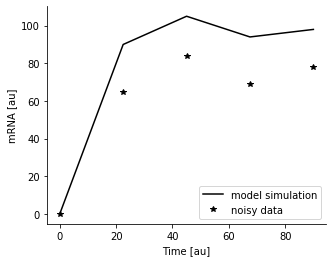

In [2]:
from study_abc_noise.model import MRNATranscription1dModelVars as ModelVars
import pyabc
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

n_t = 5
noise_model = 'binom'
mv = ModelVars(n_t=n_t, noise_model=noise_model, noise_success_probability=0.7)

model = mv.get_model()
model_noisy = mv.get_model_noisy()
prior = mv.get_prior()

def get_data():
    try:
        data_nonoise, data = pickle.load(open(f"data_{noise_model}_{n_t}.dat", 'rb'))
    except:
        data_nonoise = model(mv.p_true)
        data = mv.add_noise_to_data(data_nonoise)
        pickle.dump((data_nonoise, data), open(f"data_{noise_model}_{n_t}.dat", 'wb'))
    return data_nonoise, data

data_nonoise, data = get_data()

distance = mv.get_distance()
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()

sampler = pyabc.sampler.RedisEvalParallelSampler(host="icb-mona", port=8775, batch_size=10)
#sampler = pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20)

fig, ax = plt.subplots()
ax.plot(data_nonoise['t'], data_nonoise['mrna'], '-', color='k', label="model simulation")
ax.plot(data['t'], data['mrna'], '*', color='k', label="noisy data")
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches((5,4))
ax.set_xlabel("Time [au]")
ax.set_ylabel("mRNA [au]")

for fmt in ['svg', 'eps']:
    plt.savefig(f"data_{noise_model}.{fmt}", format=fmt)

In [32]:
abc = pyabc.ABCSMC(model, prior, distance, sampler=sampler, population_size=1000)
abc.new(f"sqlite:///h_incorrect_{noise_model}.db", data)
abc.run(max_nr_populations=13)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-27 00:11:40.044743, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 22244.499999999913
INFO:ABC:t: 0, eps: 22244.499999999913.
INFO:ABC:Acceptance rate: 1000 / 3770 = 2.6525e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 5505.999999999998.
INFO:ABC:Acceptance rate: 1000 / 3920 = 2.5510e-01, ESS=9.9662e+02.
INFO:ABC:t: 2, eps: 1576.9539425228022.
INFO:ABC:Acceptance rate: 1000 / 4010 = 2.4938e-01, ESS=9.9827e+02.
INFO:ABC:t: 3, eps: 674.0.
INFO:ABC:Acceptance rate: 1000 / 4120 = 2.4272e-01, ESS=9.8027e+02.
INFO:ABC:t: 4, eps: 394.95269188738973.
INFO:ABC:Acceptance rate: 1000 / 4980 = 2.0080e-01, ESS=7.9119e+02.
INFO:ABC:t: 5, eps: 266.0.
INFO:ABC:Acceptance rate: 1000 / 6860 = 1.4577e-01, ESS=5.6654e+02.
INFO:ABC:t: 6, eps: 177.0.
INFO:ABC:Acceptance rate: 1000 / 11200 = 8.9286e-02, ESS=7.9503e+02.
INFO:ABC:t: 7, eps: 121.0.
INFO:ABC:Acceptance rate: 1000 / 18540 = 5.3937e-02, ESS=7.9727e+02.
INFO:ABC

In [31]:
abc = pyabc.ABCSMC(model, prior, distance, sampler=sampler, population_size=1000)
abc.new(f"sqlite:///h_incorrect_{noise_model}_exactdata.db", data_nonoise)
abc.run(max_nr_populations=13)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-27 00:03:04.102651, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 21112.499999999985
INFO:ABC:t: 0, eps: 21112.499999999985.
INFO:ABC:Acceptance rate: 1000 / 3910 = 2.5575e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 5435.499999999993.
INFO:ABC:Acceptance rate: 1000 / 3980 = 2.5126e-01, ESS=9.6038e+02.
INFO:ABC:t: 2, eps: 1845.8520681819007.
INFO:ABC:Acceptance rate: 1000 / 4050 = 2.4691e-01, ESS=9.9450e+02.
INFO:ABC:t: 3, eps: 762.4264477110057.
INFO:ABC:Acceptance rate: 1000 / 4250 = 2.3529e-01, ESS=9.9111e+02.
INFO:ABC:t: 4, eps: 405.7571686568339.
INFO:ABC:Acceptance rate: 1000 / 5030 = 1.9881e-01, ESS=8.9929e+02.
INFO:ABC:t: 5, eps: 247.70668349541268.
INFO:ABC:Acceptance rate: 1000 / 7020 = 1.4245e-01, ESS=5.1414e+02.
INFO:ABC:t: 6, eps: 162.0.
INFO:ABC:Acceptance rate: 1000 / 11320 = 8.8339e-02, ESS=7.3145e+02.
INFO:ABC:t: 7, eps: 110.0.
INFO:ABC:Acceptance rate: 1000 / 20380 = 4.9068e-02, 

In [28]:
abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor, population_size=1000)
abc.new(f"sqlite:///h_stochacc_{noise_model}.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-26 23:49:34.158562, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-9.9637e+00 for t=0.
INFO:ABC:t: 0, eps: 157.66120558338304.
INFO:ABC:Acceptance rate: 1000 / 3358 = 2.9780e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-9.9637e+00 for t=1.
INFO:ABC:t: 1, eps: 30.417132534839762.
INFO:ABC:Acceptance rate: 1000 / 3250 = 3.0769e-01, ESS=9.6956e+02.
DEBUG:Acceptor:pdf_norm=-9.9637e+00 for t=2.
INFO:ABC:t: 2, eps: 11.679601335698267.
INFO:ABC:Acceptance rate: 1000 / 3320 = 3.0120e-01, ESS=9.0032e+02.
DEBUG:Acceptor:pdf_norm=-9.9637e+00 for t=3.
INFO:ABC:t: 3, eps: 5.839800667849134.
DEBUG:Acceptor:Encountered pd=-9.9559e+00 > c=-9.9637e+00, thus weight=1.0013e+00.
DEBUG:Acceptor:Encountered pd=-9.9637e+00 > c=-9.9637e+00, thus weight=1.0000e+00.
INFO:ABC:Acceptance rate: 1000 / 5049 = 1.9806e-01, ESS=8.8833e+02.
DEBUG:Acceptor:pdf_norm=-9.9559e+00 for t=4.
INFO:ABC:t: 4, eps: 2.919900333924567.
INFO:ABC:Ac

12 6


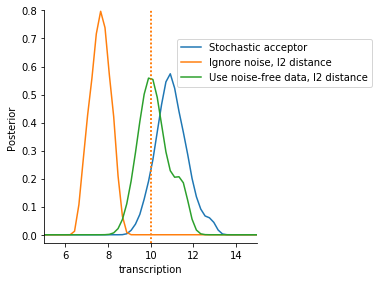

In [9]:
import pyabc
%matplotlib inline

def plot(h, x, ax, limits, p_true):
    for t in range(0, h.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(
            h, t=t, x=x, xmin=limits[x][0], xmax=limits[x][1], ax=ax,
            refval=p_true, label=f"Iter. {t}")
    ax.legend()
    return ax

h_exact = pyabc.History(f"sqlite:///h_incorrect_{noise_model}_exactdata.db")
h_incorrect = pyabc.History(f"sqlite:///h_incorrect_{noise_model}.db")
h = pyabc.History(f"sqlite:///h_stochacc_{noise_model}.db")
print(h_incorrect.max_t, h.max_t)

for p in mv.p_true:
    fig, ax = plt.subplots()
    for h, label in [(h, "Stochastic acceptor"), (h_incorrect, "Ignore noise, l2 distance"), (h_exact, "Use noise-free data, l2 distance")]:
        pyabc.visualization.plot_kde_1d_highlevel(h, x=p, xmin=5, xmax=15, ax=ax,
                                                 refval=mv.p_true, label=label)
    ax.legend(loc="upper left", bbox_to_anchor=(0.6,0.9))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    fig.set_size_inches((5,4))
    fig.tight_layout()
    ax.set_ylim(top=0.8)
    for fmt in ['svg', 'eps']:
        plt.savefig(f"kde_1d_{p}_{noise_model}.{fmt}", format=fmt)

#for p in mv.p_true:
#    _, ax = plt.subplots()
#    plot(h_incorrect, p, ax, mv.limits, mv.p_true)
#    _, ax = plt.subplots()
#    plot(h, p, ax, mv.limits, mv.p_true)
#    ax.legend()

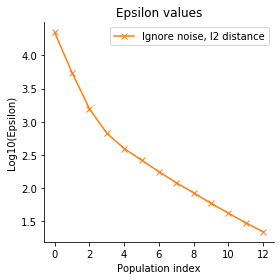

In [3]:
fig, ax = plt.subplots()
pyabc.visualization.plot_epsilons(h_incorrect, "Ignore noise, l2 distance", scale="log10", ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_lines()[-1].set_color('C1')
ax.legend()
fig.set_size_inches((4,4))
fig.tight_layout()

for fmt in ['svg', 'eps']:
    plt.savefig(f'eps_{noise_model}.{fmt}', format=f'{fmt}')

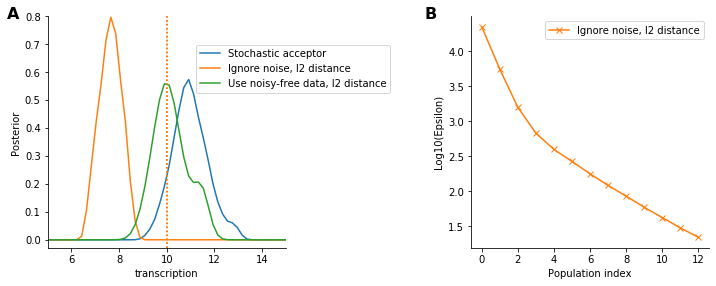

In [3]:
# combined

import pyabc
%matplotlib inline


h_exact = pyabc.History(f"sqlite:///h_incorrect_{noise_model}_exactdata.db")
h_incorrect = pyabc.History(f"sqlite:///h_incorrect_{noise_model}.db")
h = pyabc.History(f"sqlite:///h_stochacc_{noise_model}.db")


fig, arr_ax = plt.subplots(1,2)
ax = arr_ax[0]

p = 'transcription'

for h, label in [(h, "Stochastic acceptor"), (h_incorrect, "Ignore noise, l2 distance"), (h_exact, "Use noisy-free data, l2 distance")]:
    pyabc.visualization.plot_kde_1d_highlevel(h, x=p, xmin=5, xmax=15, ax=ax,
                                             refval=mv.p_true, label=label)
ax.legend(loc="upper left", bbox_to_anchor=(0.6,0.9))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(top=0.8)


ax = arr_ax[1]
pyabc.visualization.plot_epsilons(h_incorrect, "Ignore noise, l2 distance", scale="log10", ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_lines()[-1].set_color('C1')
ax.set_title(None)
ax.legend()


fig.set_size_inches((10, 4))


plt.figtext(0.01, 0.94, "A", size=16, weight='bold')
plt.figtext(0.59, 0.94, "B", size=16, weight='bold')

fig.tight_layout()


for fmt in ['svg', 'eps']:
    plt.savefig(f"kde_1d_{p}_and_eps_{noise_model}.{fmt}", format=fmt)